In [1]:
from pathlib import Path

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import json

filedata = None

with open('results/ae_evaluation_results.json') as f:
    filedata = json.load(f)

In [4]:
errorrates = {
    'FGSM': {
        'EOTOFF': {
            'UM': {},
            'Ensemble': {},
            'PGD-ADT': {}
        },
        'EOTON': {
            'UM': {},
            'Ensemble': {},
            'PGD-ADT': {}
        }
    },
    'PGD': {
        'EOTOFF': {
            'UM': {},
            'Ensemble': {},
            'PGD-ADT': {}
        },
        'EOTON': {
            'UM': {},
            'Ensemble': {},
            'PGD-ADT': {}
        }
    }
}

for key in filedata.keys():
    attack, *rest = key.split('_')
    rest = rest[0]
    
    eps = 0
    eot = False
    
    if 'EOT' in rest:
        eot = False
        
        rest = rest.split('-')[0]
    else:
        eot = True
        
        rest = rest[:-4]
    
    eps = float(rest[3:])
    
    for model in filedata[key].keys():
        errorrate = filedata[key][model]
        
        errorrates[attack]['EOTON' if eot else 'EOTOFF'][model][eps] = errorrate

In [5]:
def getpoints(data):
    data = list(data.items())

    data.sort(key=lambda x: x[0])

    x = [x[0] for x in data]
    y = [x[1] for x in data]
    
    return x, y

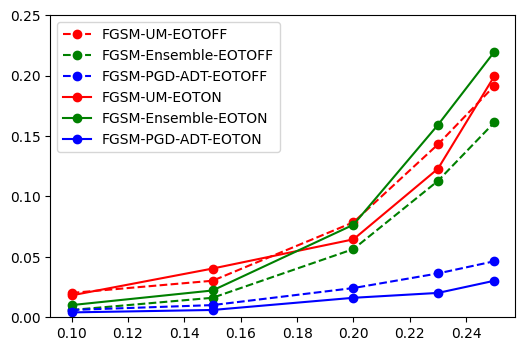

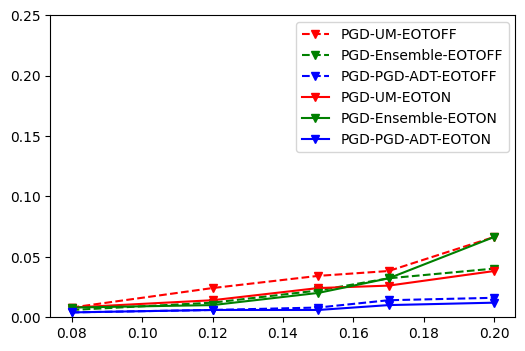

In [18]:
attacks = ['FGSM', 'PGD']
eotmodes = ['EOTOFF', 'EOTON']
models = ['UM', 'Ensemble', 'PGD-ADT']

attackstyles = {
    'FGSM': 'o',
    'PGD': 'v'
}
modelcolors = {
    'UM': 'r',
    'Ensemble': 'g',
    'PGD-ADT': 'b'
}

# FGSM

plt.figure(dpi=100)
plt.ylim(0, 0.25)

for eot in eotmodes:
    for model in models:
        x, y = getpoints(errorrates['FGSM'][eot][model])

        style = ('-' if eot is 'EOTON' else '--') + attackstyles['FGSM'] + modelcolors[model]
        label = f"FGSM-{model}-" + eot

        plt.plot(x, y, style, label=label)

plt.legend()
Path('graphs').mkdir(exist_ok=True)
plt.savefig("graphs/FGSM.png")
plt.show()

# PGD

plt.figure(dpi=100)
plt.ylim(0, 0.25)

for eot in eotmodes:
    for model in models:
        x, y = getpoints(errorrates['PGD'][eot][model])

        style = ('-' if eot is 'EOTON' else '--') + attackstyles['PGD'] + modelcolors[model]
        label = f"PGD-{model}-" + eot

        plt.plot(x, y, style, label=label)

plt.legend()
Path('graphs').mkdir(exist_ok=True)
plt.savefig("graphs/PGD.png")
plt.show()